In [1]:
#Downloading Zip Files
!wget -q --no-check-certificate https://www.crcv.ucf.edu/data/UCF101/UCF101.rar
!wget -q --no-check-certificate https://www.crcv.ucf.edu/data/UCF101/UCF101TrainTestSplits-RecognitionTask.zip

In [2]:
#Extracting Zip Files
%%capture
!unrar e UCF101.rar data/
!unzip -qq UCF101TrainTestSplits-RecognitionTask.zip

In [3]:
from imutils import paths
from tqdm import tqdm
import pandas as pd
import numpy as np
import shutil
import cv2

In [4]:
# Open the .txt file which have names of training videos
f = open("ucfTrainTestlist/trainlist01.txt", "r")
temp = f.read()
videos = temp.split('\n')

# Create a dataframe having video names
train = pd.DataFrame()
train['video_name'] = videos
train = train[:-1]
train.tail()

,video_name
9532,YoYo/v_YoYo_g25_c01.avi 101
9533,YoYo/v_YoYo_g25_c02.avi 101
9534,YoYo/v_YoYo_g25_c03.avi 101
9535,YoYo/v_YoYo_g25_c04.avi 101
9536,YoYo/v_YoYo_g25_c05.avi 101


In [5]:
# Open the .txt file which have names of test videos
with open("ucfTrainTestlist/testlist01.txt", "r") as f:
    temp = f.read()
videos = temp.split("\n")

# Create a dataframe having video names
test = pd.DataFrame()
test["video_name"] = videos
test = test[:-1]
test.tail(10)

,video_name
3773,YoYo/v_YoYo_g05_c04.avi
3774,YoYo/v_YoYo_g05_c05.avi
3775,YoYo/v_YoYo_g06_c01.avi
3776,YoYo/v_YoYo_g06_c02.avi
3777,YoYo/v_YoYo_g06_c03.avi
3778,YoYo/v_YoYo_g06_c04.avi
3779,YoYo/v_YoYo_g07_c01.avi
3780,YoYo/v_YoYo_g07_c02.avi
3781,YoYo/v_YoYo_g07_c03.avi
3782,YoYo/v_YoYo_g07_c04.avi


In [6]:
import os
#Extracting Tag
def extract_tag(video_path):
    return video_path.split("/")[0]

#Separating Video
def separate_video_name(video_name):
    return video_name.split("/")[1]

#Rectifying Additional Information from Video Name
def rectify_video_name(video_name):
    return video_name.split(" ")[0]

#Moving videos from a DataFrame to a specified output directory
def move_videos(df, output_dir):
    if not os.path.exists(output_dir):
        os.mkdir(output_dir)
    for i in tqdm(range(df.shape[0])):
        videoFile = df['video_name'][i].split("/")[-1]
        videoPath = os.path.join("data", videoFile)
        shutil.copy2(videoPath, output_dir)
    print()
    print(f"Total videos: {len(os.listdir(output_dir))}")

In [7]:
train["tag"] = train["video_name"].apply(extract_tag)
train["video_name"] = train["video_name"].apply(separate_video_name)
train.head()

<ipython-input-7-14b901c16992>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["tag"] = train["video_name"].apply(extract_tag)
<ipython-input-7-14b901c16992>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["video_name"] = train["video_name"].apply(separate_video_name)


,video_name,tag
0,v_ApplyEyeMakeup_g08_c01.avi 1,ApplyEyeMakeup
1,v_ApplyEyeMakeup_g08_c02.avi 1,ApplyEyeMakeup
2,v_ApplyEyeMakeup_g08_c03.avi 1,ApplyEyeMakeup
3,v_ApplyEyeMakeup_g08_c04.avi 1,ApplyEyeMakeup
4,v_ApplyEyeMakeup_g08_c05.avi 1,ApplyEyeMakeup


In [8]:
train["video_name"] = train["video_name"].apply(rectify_video_name)
train.head()

<ipython-input-8-b3307d188c38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["video_name"] = train["video_name"].apply(rectify_video_name)


,video_name,tag
0,v_ApplyEyeMakeup_g08_c01.avi,ApplyEyeMakeup
1,v_ApplyEyeMakeup_g08_c02.avi,ApplyEyeMakeup
2,v_ApplyEyeMakeup_g08_c03.avi,ApplyEyeMakeup
3,v_ApplyEyeMakeup_g08_c04.avi,ApplyEyeMakeup
4,v_ApplyEyeMakeup_g08_c05.avi,ApplyEyeMakeup


In [9]:
test["tag"] = test["video_name"].apply(extract_tag)
test["video_name"] = test["video_name"].apply(separate_video_name)
test.head()

,video_name,tag
0,v_ApplyEyeMakeup_g01_c01.avi,ApplyEyeMakeup
1,v_ApplyEyeMakeup_g01_c02.avi,ApplyEyeMakeup
2,v_ApplyEyeMakeup_g01_c03.avi,ApplyEyeMakeup
3,v_ApplyEyeMakeup_g01_c04.avi,ApplyEyeMakeup
4,v_ApplyEyeMakeup_g01_c05.avi,ApplyEyeMakeup


In [10]:
#Selecting top 5 most frequent tag in the train data
# Define a list of valueu want to select
selected_tags = ["Basketball","BasketballDunk","Biking","CliffDiving","CricketBowling"]  # Replace these with your desired values

# Filter the "train" DataFrame to include only rows with the selected tags
train_new = train[train["tag"].isin(selected_tags)]

# Filter the "test" DataFrame in the same way if needed
test_new = test[test["tag"].isin(selected_tags)]

# Display the shapes of the resulting DataFrames
print(train_new.shape, test_new.shape)


(491, 2) (185, 2)


In [11]:
train_new = train_new.reset_index(drop=True)
test_new = test_new.reset_index(drop=True)

In [12]:
import os
move_videos(train_new, "train")
move_videos(test_new, "test")

100%|██████████| 491/491 [00:01<00:00, 354.25it/s]



Total videos: 491


100%|██████████| 185/185 [00:00<00:00, 331.97it/s]


Total videos: 185


In [13]:
train_new.to_csv("train.csv", index=False)
test_new.to_csv("test.csv", index=False)

In [14]:
!tar cf ucf101_top10.tar.gz train test train.csv test.csv

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
!cp ucf101_top10.tar.gz /content/drive/MyDrive

In [17]:
!pip install -q git+https://github.com/tensorflow/docs

  Preparing metadata (setup.py) ... done


In [18]:
from tensorflow_docs.vis import embed
from tensorflow import keras
from imutils import paths

import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np
import imageio
import cv2
import os

In [19]:
IMG_SIZE = 224
BATCH_SIZE = 64

MAX_SEQ_LENGTH = 16
NUM_FEATURES = 2048

In [20]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print(f"Total videos for training: {len(train_df)}")
print(f"Total videos for testing: {len(test_df)}")

train_df.sample(10)

Total videos for training: 491
Total videos for testing: 185


,video_name,tag
367,v_CliffDiving_g21_c04.avi,CliffDiving
417,v_CricketBowling_g13_c01.avi,CricketBowling
303,v_CliffDiving_g10_c05.avi,CliffDiving
285,v_Biking_g25_c01.avi,Biking
340,v_CliffDiving_g17_c03.avi,CliffDiving
446,v_CricketBowling_g18_c02.avi,CricketBowling
131,v_BasketballDunk_g14_c04.avi,BasketballDunk
141,v_BasketballDunk_g15_c07.avi,BasketballDunk
102,v_BasketballDunk_g08_c04.avi,BasketballDunk
490,v_CricketBowling_g25_c07.avi,CricketBowling


In [21]:
# Cropping a Frame into Square and returning as Np Array
#Resizing
def crop_center_square(frame):
    y, x = frame.shape[0:2]
    min_dim = min(y, x)
    start_x = (x // 2) - (min_dim // 2)
    start_y = (y // 2) - (min_dim // 2)
    return frame[start_y : start_y + min_dim, start_x : start_x + min_dim]


def load_video(path, max_frames=0, resize=(IMG_SIZE, IMG_SIZE)):
    cap = cv2.VideoCapture(path)
    frames = []
    try:
        while True:
            ret, frame = cap.read()
            if not ret:
                break
            frame = crop_center_square(frame)
            frame = cv2.resize(frame, resize)
            frame = frame[:, :, [2, 1, 0]]
            frames.append(frame)

            if len(frames) == max_frames:
                break
    finally:
        cap.release()
    return np.array(frames)

In [22]:
#Extracting meaningful features from the extracted frames using pretrained model
def build_feature_extractor():
    feature_extractor = keras.applications.InceptionV3(
        weights="imagenet",
        include_top=False,
        pooling="avg",
        input_shape=(IMG_SIZE, IMG_SIZE, 3),
    )
    preprocess_input = keras.applications.inception_v3.preprocess_input

    inputs = keras.Input((IMG_SIZE, IMG_SIZE, 3))
    preprocessed = preprocess_input(inputs)

    outputs = feature_extractor(preprocessed)
    return keras.Model(inputs, outputs, name="feature_extractor")


feature_extractor = build_feature_extractor()

87910968/87910968 [==============================] - 0s 0us/step


In [23]:
label_processor = keras.layers.StringLookup(
    num_oov_indices=0, vocabulary=np.unique(train_df["tag"])
)
print(label_processor.get_vocabulary())

['Basketball', 'BasketballDunk', 'Biking', 'CliffDiving', 'CricketBowling']


In [24]:
def prepare_all_videos(df, root_dir):
    num_samples = len(df)
    video_paths = df["video_name"].values.tolist()
    labels = df["tag"].values
    labels = label_processor(labels[..., None]).numpy()

    # `frame_masks` and `frame_features` are what we will feed to our sequence model.
    # `frame_masks` will contain a bunch of booleans denoting if a timestep is
    # masked with padding or not.
    frame_masks = np.zeros(shape=(num_samples, MAX_SEQ_LENGTH), dtype="bool")
    frame_features = np.zeros(
        shape=(num_samples, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
    )

    # For each video.
    for idx, path in enumerate(video_paths):
        # Gather all its frames and add a batch dimension.
        frames = load_video(os.path.join(root_dir, path))
        frames = frames[None, ...]

        # Initialize placeholders to store the masks and features of the current video.
        temp_frame_mask = np.zeros(shape=(1, MAX_SEQ_LENGTH,), dtype="bool")
        temp_frame_features = np.zeros(
            shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32"
        )

        # Extract features from the frames of the current video.
        for i, batch in enumerate(frames):
            video_length = batch.shape[0]
            length = min(MAX_SEQ_LENGTH, video_length)
            for j in range(length):
                temp_frame_features[i, j, :] = feature_extractor.predict(
                    batch[None, j, :]
                )
            temp_frame_mask[i, :length] = 1  # 1 = not masked, 0 = masked

        frame_features[idx,] = temp_frame_features.squeeze()
        frame_masks[idx,] = temp_frame_mask.squeeze()

    return (frame_features, frame_masks), labels


train_data, train_labels = prepare_all_videos(train_df, "train")
test_data, test_labels = prepare_all_videos(test_df, "test")

print(f"Frame features in train set: {train_data[0].shape}")
print(f"Frame masks in train set: {train_data[1].shape}")

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 33ms/step
Frame features in train set: (491, 16, 2048)
Frame masks in train set: (491, 16)


In [92]:
import tensorflow as tf
from tensorflow import keras

def self_attention(inputs):
    # Define the query, key, and value vectors
    query = keras.layers.Dense(units=64)(inputs)
    key = keras.layers.Dense(units=64)(inputs)
    value = keras.layers.Dense(units=64)(inputs)

    # Calculate attention scores
    attention_scores = tf.matmul(query, key, transpose_b=True)
    attention_scores = keras.layers.Activation('softmax')(attention_scores)

    # Apply attention weights to the value vectors
    weighted_inputs = tf.matmul(attention_scores, value)

    return weighted_inputs

def get_sequence_model():
    class_vocab = label_processor.get_vocabulary()

    frame_features_input = keras.Input((MAX_SEQ_LENGTH, NUM_FEATURES))
    mask_input = keras.Input((MAX_SEQ_LENGTH, MAX_SEQ_LENGTH), dtype=tf.bool)  # Adjust dimensions

    # Apply self-attention mechanism
    attended_inputs = self_attention(frame_features_input)

    x = keras.layers.GRU(256, return_sequences=True)(attended_inputs)
    x = keras.layers.GRU(32)(x)
    x = keras.layers.Dropout(0.4)(x)  # Increased dropout rate
    x = keras.layers.Dense(32, activation="relu")(x)
    output = keras.layers.Dense(len(class_vocab), activation="softmax")(x)

    model = keras.Model([frame_features_input, mask_input], output)
    optimizer = keras.optimizers.SGD(learning_rate=0.002)
    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=optimizer,
        metrics=["accuracy"]
    )

    return model

# Create an Instance of Early Stopping Callback
sequ_model = get_sequence_model()
filepath = "/tmp/video"
checkpoint = keras.callbacks.ModelCheckpoint(
        filepath, save_weights_only=True, save_best_only=True, verbose=1
    )

# Start training the model.
model_history = sequ_model.fit(train_data,
        train_labels,
        validation_data=(test_data, test_labels),
        epochs=200,
        batch_size=32,  # Adjust batch size
        callbacks=[checkpoint])


Epoch 1/200
12/16 [=====================>........] - ETA: 0s - loss: 1.6159 - accuracy: 0.2135
Epoch 1: val_loss improved from inf to 1.56750, saving model to /tmp/video
16/16 [==============================] - 6s 67ms/step - loss: 1.6001 - accuracy: 0.2301 - val_loss: 1.5675 - val_accuracy: 0.2649
Epoch 2/200
12/16 [=====================>........] - ETA: 0s - loss: 1.5451 - accuracy: 0.3125
Epoch 2: val_loss improved from 1.56750 to 1.52153, saving model to /tmp/video
16/16 [==============================] - 0s 18ms/step - loss: 1.5405 - accuracy: 0.3055 - val_loss: 1.5215 - val_accuracy: 0.3784
Epoch 3/200
13/16 [=======================>......] - ETA: 0s - loss: 1.4961 - accuracy: 0.3774
Epoch 3: val_loss improved from 1.52153 to 1.47586, saving model to /tmp/video
16/16 [==============================] - 0s 17ms/step - loss: 1.4968 - accuracy: 0.3829 - val_loss: 1.4759 - val_accuracy: 0.4703
Epoch 4/200
12/16 [=====================>........] - ETA: 0s - loss: 1.4317 - accuracy: 0.45

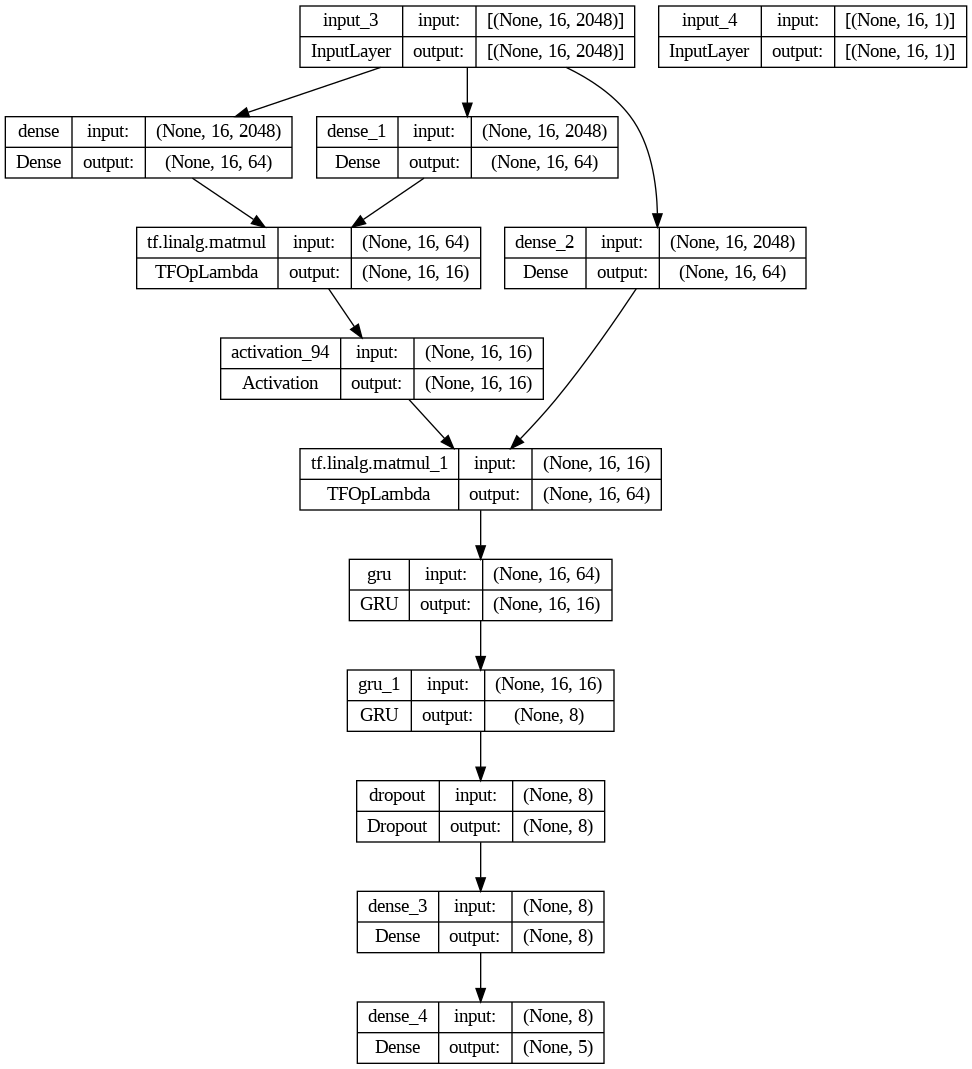

In [26]:
from tensorflow.keras.utils import plot_model
plot_model(seq_model, to_file = 'LRCN_model_structure_plot.png', show_shapes = True, show_layer_names = True)

In [86]:
model_evaluation = sequ_model.evaluate(test_data, test_labels)

6/6 [==============================] - 0s 7ms/step - loss: 0.2773 - accuracy: 0.9189


In [87]:
def plot_metric(model_training_history, metric_name_1, metric_name_2, plot_name):
    '''
    This function will plot the metrics passed to it in a graph.
    Args:
        model_training_history: A history object containing a record of training and validation
                                loss values and metrics values at successive epochs
        metric_name_1:          The name of the first metric that needs to be plotted in the graph.
        metric_name_2:          The name of the second metric that needs to be plotted in the graph.
        plot_name:              The title of the graph.
    '''

    # Get metric values using metric names as identifiers.
    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]

    # Construct a range object which will be used as x-axis (horizontal plane) of the graph.
    epochs = range(len(metric_value_1))

    # Plot the Graph.
    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
    plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)

    # Add title to the plot.
    plt.title(str(plot_name))

    # Add legend to the plot.
    plt.legend()

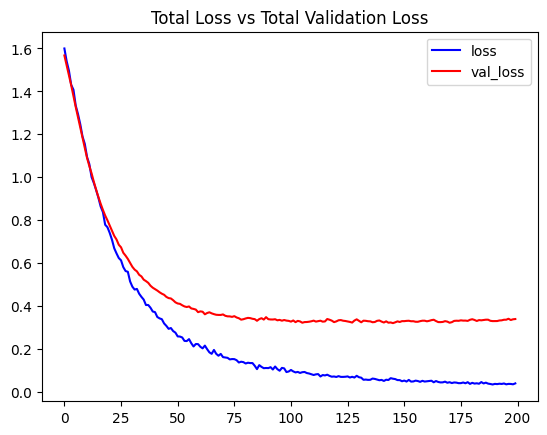

In [93]:
plot_metric(model_history, 'loss', 'val_loss', 'Total Loss vs Total Validation Loss')

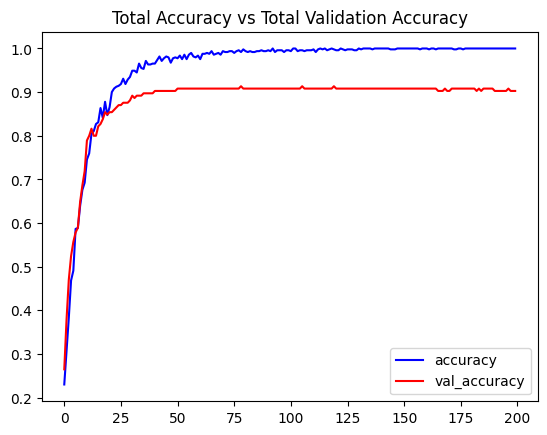

In [94]:
# Visualize the training and validation accuracy metrices.
plot_metric(model_history, 'accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

In [95]:
!pip install pytube
from pytube import YouTube

def download_youtube_videos(youtube_video_url, output_directory):
    '''
    This function downloads the YouTube video whose URL is passed to it as an argument.
    Args:
        youtube_video_url: URL of the video that is required to be downloaded.
        output_directory: The directory path to which the video needs to be stored after downloading.
    Returns:
        title: The title of the downloaded YouTube video.
        file_path: The full path of the downloaded video file.
    '''
    yt = YouTube(youtube_video_url)
    video = yt.streams.first()
    title = yt.title
    file_path = video.download(output_directory)
    return title, file_path


In [102]:
video_url = "https://www.youtube.com/shorts/LC-SQUMZeTM"
test_videos_directory="test_videos"
video_title,input_video_file_path= download_youtube_videos(video_url, test_videos_directory)
print("Sucess")

Sucess


In [33]:
from moviepy.editor import VideoFileClip


In [103]:
def prepare_single_video(frames):
    frames = frames[None, ...]
    frame_mask = np.zeros(shape=(1, MAX_SEQ_LENGTH,), dtype="bool")
    frame_features = np.zeros(shape=(1, MAX_SEQ_LENGTH, NUM_FEATURES), dtype="float32")

    for i, batch in enumerate(frames):
        video_length = batch.shape[0]
        length = min(MAX_SEQ_LENGTH, video_length)
        for j in range(length):
            frame_features[i, j, :] = feature_extractor.predict(batch[None, j, :])
        frame_mask[i, :length] = 1  # 1 = not masked, 0 = masked

    return frame_features, frame_mask


def sequence_prediction(path):
    class_vocab = label_processor.get_vocabulary()

    frames = load_video(os.path.join("test_videos", path))
    frame_features, frame_mask = prepare_single_video(frames)
    probabilities = sequ_model.predict([frame_features, frame_mask])[0]

    for i in np.argsort(probabilities)[::-1]:
        print(f"  {class_vocab[i]}: {probabilities[i] * 100:5.2f}%")
    return frames


# This utility is for visualization.
# Referenced from:
# https://www.tensorflow.org/hub/tutorials/action_recognition_with_tf_hub
sequence_prediction(input_video_file_path)

# Display the output video.
output_clip = VideoFileClip(input_video_file_path, audio=True, target_resolution=(300, None))
output_clip.ipython_display(maxduration=300)

1/1 [==============================] - 0s 22ms/step
  Biking: 94.59%
  CliffDiving:  2.07%
  CricketBowling:  1.49%
  Basketball:  1.30%
  BasketballDunk:  0.56%
Moviepy - Building video __temp__.mp4.
MoviePy - Writing audio in __temp__TEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video __temp__.mp4



t:  59%|█████▊    | 41/70 [00:00<00:00, 407.66it/s, now=None]WARNING:py.warnings:/usr/local/lib/python3.10/dist-packages/moviepy/video/io/ffmpeg_reader.py:123: UserWarning: Warning: in file /content/test_videos/cycle wheeling videoshortsvideo short viral sports cycle cyclestunt.3gpp, 329400 bytes wanted but 0 bytes read,at frame 69/70, at time 9.20/9.33 sec. Using the last valid frame instead.
  warnings.warn("Warning: in file %s, "%(self.filename)+



Moviepy - Done !
Moviepy - video ready __temp__.mp4
